In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이진 영상의 모폴로지 처리

여러 가지 영상 이진화 기법을 사용했을 때 때로는 결과 영상에서 흰색 영역이나 검은색 영역이 원하는 의도보다 넓거나 좁게 얻어질 수 있다. 최적의 문턱값을 사용하면서 잘못된 분리 영역은 후처리 과정을 통하여 결과를 수정하는 기법을 많이 사용하는 데 이를 모폴로지 처리라고 한다. 모폴로지 처리는 대상 영역이 좁아지는 침식 연산, 대상 영역이 넓어지는 팽창 연산, 대상 영역에서 세부 영역이 제거되는 열림 연산, 빈틈이 채워지는 닫힘 연산이 있다. 일반적으로 대상 영역은 이진 영상에서 흰색으로 표시된 영역을, 회색조 영상에서는 밝은 영역을 가리킨다. 침식과 팽창 연산은 기본적인 연산에 해당하며 열림과 닫힘 연산은 침식과 팽창 연산의 조합으로 구성된다

In [2]:
image = cv2.imread('../data/Lena.png',0)
_, binary = cv2.threshold(image,-1,1,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

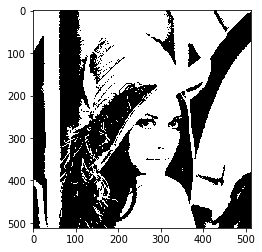

In [4]:
plt.imshow(binary,cmap='gray')

1. 이진 영상의 침식 연산

침식은 입력한 이진 영상의 각 픽셀에 마스크를 놓았을 때 마스크가 255값을 가지는 모든 픽셀 위치에 대하여 입력 영상도 255 값을 가져야만 결과값이 255가 되는 연산이다. 만약 대상 위치에서 한 픽셀이라도 0 값을 가지면 결과값은 0이 되기 때문에 전체적으로 255값을 가지는 영역이 줄어드는 결과가 나타난다.

In [5]:
eroded= cv2.morphologyEx(binary,cv2.MORPH_ERODE,(3,3),iterations=10)

2. 이진 영상의 팽창 연산

팽창 연산은 침식 연산과 반대로 마스크의 유효 영역에 이쓴 픽셀들을 모두 밝게 만드는 역할을 한다.

In [6]:
dilated = cv2.morphologyEx(binary,cv2.MORPH_DILATE,(3,3),iterations=10)

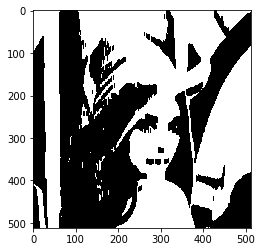

In [7]:
plt.imshow(eroded,cmap='gray')

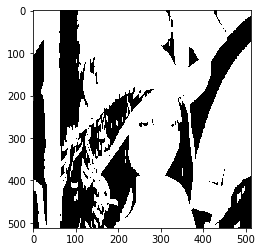

In [8]:
plt.imshow(dilated,cmap='gray')

3. 이진 영상의 열림과 닫힘 연산

열림과 닫힘 연산은 침식과 팽창 연산을 결합한 형태로 구현할 수 있다. 열림 연산은 밝은 영역에 나타난 미세한 조각을 제거할 수 있도록 하는 연산이다. 먼저 침식 연산을 수행하여 밝은 영역을 전체적으로 축소한 다음 팽창 연산을 뒤이어 수행하여 전체적인 넓이를 원래대로 복구한다. 이러한 원리로 미세한 조각을 제거한다.

닫힘 연산은 밝은 영역에 생긴 미세한 틈을 메우는 역할을 한다. 먼저 팽창 연산을 수행하여 밝은 영역을 넓히고 다시 침식 연산을 수행한다. 틈새에 해당하는 영역은 팽창 연산을 통해 메워진다. 

In [10]:
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN,
                          cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)),
                          iterations=5)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE,
                          cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)),
                          iterations=5)

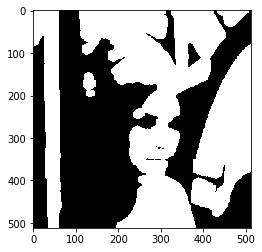

In [11]:
plt.imshow(opened,cmap='gray')

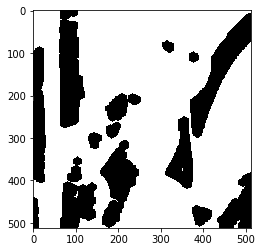

In [12]:
plt.imshow(closed,cmap='gray')

In [13]:
grad = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT,
                          cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

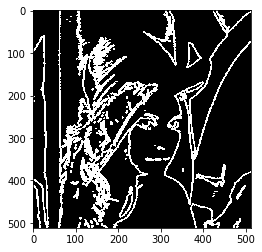

In [15]:
plt.imshow(grad,cmap='gray')

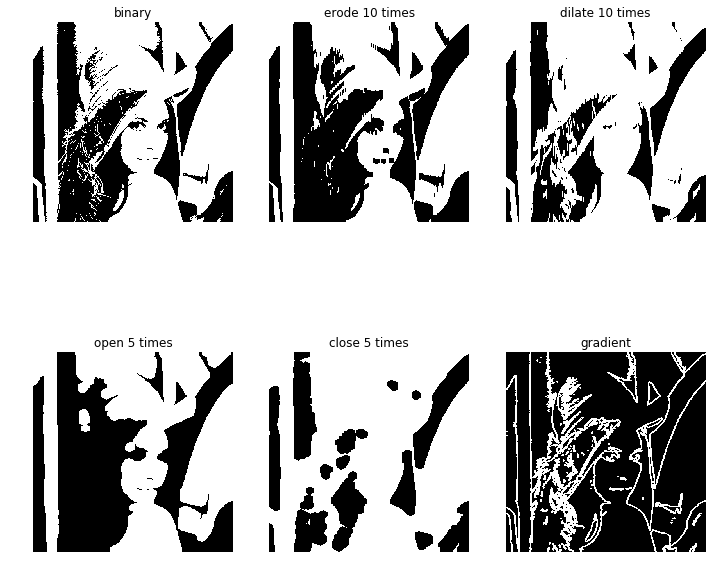

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.axis('off')
plt.title('binary')
plt.imshow(binary, cmap='gray')
plt.subplot(232)
plt.axis('off')
plt.title('erode 10 times')
plt.imshow(eroded, cmap='gray')
plt.subplot(233)
plt.axis('off')
plt.title('dilate 10 times')
plt.imshow(dilated, cmap='gray')
plt.subplot(234)
plt.axis('off')
plt.title('open 5 times')
plt.imshow(opened, cmap='gray')
plt.subplot(235)
plt.axis('off')
plt.title('close 5 times')
plt.imshow(closed, cmap='gray')
plt.subplot(236)
plt.axis('off')
plt.title('gradient')
plt.imshow(grad, cmap='gray')
plt.tight_layout()
plt.show()